# **VEHICLE INSURANCE FRAUD DETECTION USING MACHINE LEARNING**

In [ ]:
#Importing the necessary libraries
import pathlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# **Data Pre-Processing and Quality Check**

Here I was Loading the dataset and began inspecting the data. I was primarily tring to understand the data types, checking for missing values, duplicates, ensuring consistency and accuraccy in the data. Also indentifying the target variable.




In [ ]:
#Loading The Dataset
fraud=pd.read_csv('fraud_oracle.csv')

***DATA INSPECTION & HANDLING***

In [ ]:
#Checking the rows and columns
fraud.shape

(15420, 33)

In [ ]:
# Previewing the first 10 rows
fraud.head(10)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
5,Oct,4,Friday,Honda,Urban,Wednesday,Nov,1,Male,Single,...,5 years,21 to 25,No,No,External,3 to 5,no change,1 vehicle,1994,Collision
6,Feb,1,Saturday,Honda,Urban,Monday,Feb,3,Male,Married,...,7 years,36 to 40,No,No,External,1 to 2,no change,1 vehicle,1994,Collision
7,Nov,1,Friday,Honda,Urban,Tuesday,Mar,4,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Collision
8,Dec,4,Saturday,Honda,Urban,Wednesday,Dec,5,Male,Single,...,6 years,31 to 35,No,Yes,External,3 to 5,no change,1 vehicle,1994,Collision
9,Apr,3,Tuesday,Ford,Urban,Wednesday,Apr,3,Male,Married,...,more than 7,36 to 40,No,No,External,3 to 5,no change,1 vehicle,1994,All Perils


In [ ]:
# Checking the Data type count
fraud.dtypes.value_counts()

,count
object,24
int64,9


In [ ]:
# list of categorical variables
fraud.columns[fraud.dtypes == 'object']

Index(['Month', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed',
       'MonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType',
       'VehicleCategory', 'VehiclePrice', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars',
       'BasePolicy'],
      dtype='object')

In [ ]:
# list of numerical variables
fraud.columns[fraud.dtypes == 'int64']

Index(['WeekOfMonth', 'WeekOfMonthClaimed', 'Age', 'FraudFound_P',
       'PolicyNumber', 'RepNumber', 'Deductible', 'DriverRating', 'Year'],
      dtype='object')

In [ ]:
#
fraud.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,0.059857,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,0.237230,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,0.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,0.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,0.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


In [ ]:
#Checking For Missing valus
print(fraud.isnull().sum())

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64


In [ ]:
#Checking for Duplicates
fraud.duplicated().sum()

0

# ***Variable Summary***

In [ ]:
#Summarize the characteristic of dataset
def summarize(DataFrame):

    summary = pd.DataFrame()
    summary['Data Type'] = DataFrame.dtypes
    summary['N Unique'] = DataFrame.nunique()
    summary['Unique'] = DataFrame.apply(lambda x: x.unique().tolist())
    summary['Max'] = DataFrame.apply(lambda x: x.max() if pd.api.types.is_numeric_dtype(x) else '-')
    summary['Min'] = DataFrame.apply(lambda x: x.min() if pd.api.types.is_numeric_dtype(x) else '-')

    #Mean, Median, Mode
    summary['Mean'] = DataFrame.apply(lambda x: round(x.mean(), 2) if pd.api.types.is_numeric_dtype(x) else '-')
    summary['Median'] = DataFrame.apply(lambda x: x.median() if pd.api.types.is_numeric_dtype(x) else '-')
    summary['Mode'] = DataFrame.apply(lambda x: x.mode().iloc[0] if not x.mode().empty else '-')

    #Range, Variance, Standard Deviation
    summary['Range'] = DataFrame.apply(lambda x: x.max() - x.min() if pd.api.types.is_numeric_dtype(x) else '-')
    summary['Variance'] = DataFrame.apply(lambda x: x.var() if pd.api.types.is_numeric_dtype(x) else '-')
    summary['Standard Deviation'] = DataFrame.apply(lambda x: x.std() if pd.api.types.is_numeric_dtype(x) else '-')

    #Skewness, Kurtosis
    summary['Skewness'] = DataFrame.apply(lambda x: round(x.skew(), 2) if pd.api.types.is_numeric_dtype(x) else '-')
    summary['Kurtosis'] = DataFrame.apply(lambda x: round(x.kurt(), 2) if pd.api.types.is_numeric_dtype(x) else '-')

    return summary

In [ ]:
summary = summarize(fraud)
summary

,Data Type,N Unique,Unique,Max,Min,Mean,Median,Mode,Range,Variance,Standard Deviation,Skewness,Kurtosis
Month,object,12,"[Dec, Jan, Oct, Jun, Feb, Nov, Apr, Mar, Aug, ...",-,-,-,-,Jan,-,-,-,-,-
WeekOfMonth,int64,5,"[5, 3, 2, 4, 1]",5,1,2.79,3.0,3,4,1.657876,1.287585,0.12,-1.1
DayOfWeek,object,7,"[Wednesday, Friday, Saturday, Monday, Tuesday,...",-,-,-,-,Monday,-,-,-,-,-
Make,object,19,"[Honda, Toyota, Ford, Mazda, Chevrolet, Pontia...",-,-,-,-,Pontiac,-,-,-,-,-
AccidentArea,object,2,"[Urban, Rural]",-,-,-,-,Urban,-,-,-,-,-
DayOfWeekClaimed,object,8,"[Tuesday, Monday, Thursday, Friday, Wednesday,...",-,-,-,-,Monday,-,-,-,-,-
MonthClaimed,object,13,"[Jan, Nov, Jul, Feb, Mar, Dec, Apr, Aug, May, ...",-,-,-,-,Jan,-,-,-,-,-
WeekOfMonthClaimed,int64,5,"[1, 4, 2, 3, 5]",5,1,2.69,3.0,2,4,1.585371,1.259115,0.16,-1.09
Sex,object,2,"[Female, Male]",-,-,-,-,Male,-,-,-,-,-
MaritalStatus,object,4,"[Single, Married, Widow, Divorced]",-,-,-,-,Married,-,-,-,-,-


# ***Plotting Fraud by Variable***

Month  FraudFound_P  Count  Percentage of Fraud  Percentage of Total Fraud Cases
  Mar             1    102                 7.50                            11.05
  Aug             1     84                 7.45                             9.10
  May             1     94                 6.88                            10.18
  Feb             1     82                 6.48                             8.88
  Apr             1     80                 6.25                             8.67
  Jan             1     87                 6.17                             9.43
  Sep             1     76                 6.13                             8.23
  Jun             1     80                 6.06                             8.67
  Oct             1     70                 5.36                             7.58
  Dec             1     62                 4.82                             6.72
  Jul             1     60                 4.77                             6.50
  Nov             1     46  

<ipython-input-40-9852021f5454>:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-40-9852021f5454>:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


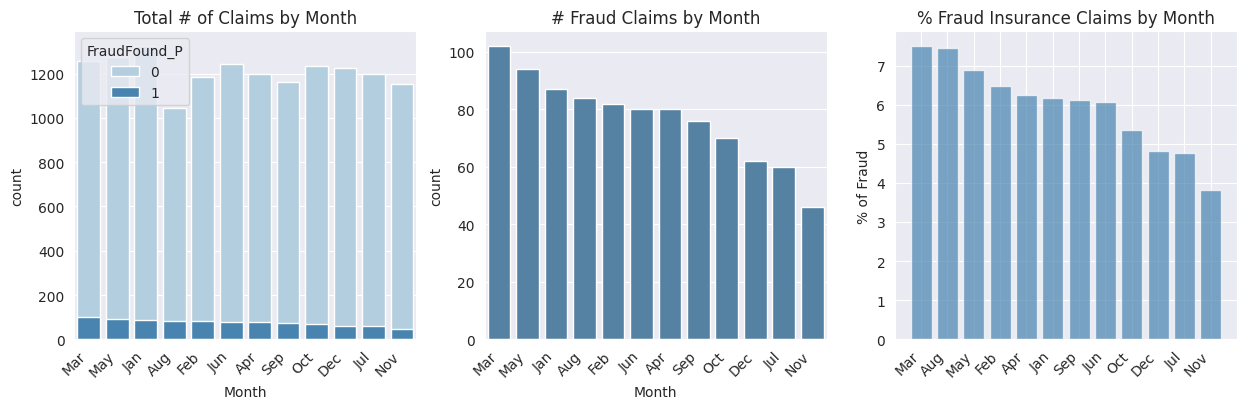

 WeekOfMonth  FraudFound_P  Count  Percentage of Fraud  Percentage of Total Fraud Cases
           2             1    225                 6.32                            24.38
           1             1    200                 6.28                            21.67
           3             1    215                 5.91                            23.29
           4             1    192                 5.65                            20.80
           5             1     91                 5.56                             9.86
           5             0   1546                94.44                              NaN
           4             0   3206                94.35                              NaN
           3             0   3425                94.09                              NaN
           1             0   2987                93.72                              NaN
           2             0   3333                93.68                              NaN


<ipython-input-40-9852021f5454>:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-40-9852021f5454>:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


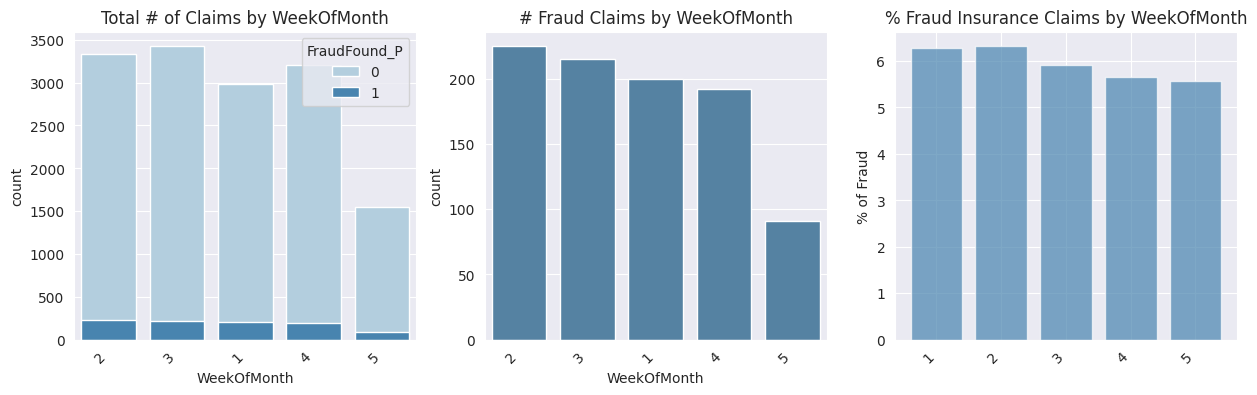

DayOfWeek  FraudFound_P  Count  Percentage of Fraud  Percentage of Total Fraud Cases
   Sunday             1    122                 6.99                            13.22
 Saturday             1    132                 6.66                            14.30
   Friday             1    154                 6.30                            16.68
   Monday             1    160                 6.12                            17.33
 Thursday             1    120                 5.52                            13.00
Wednesday             1    115                 5.33                            12.46
  Tuesday             1    120                 5.22                            13.00
  Tuesday             0   2180                94.78                              NaN
Wednesday             0   2044                94.67                              NaN
 Thursday             0   2053                94.48                              NaN
   Monday             0   2456                93.88              

<ipython-input-40-9852021f5454>:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-40-9852021f5454>:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


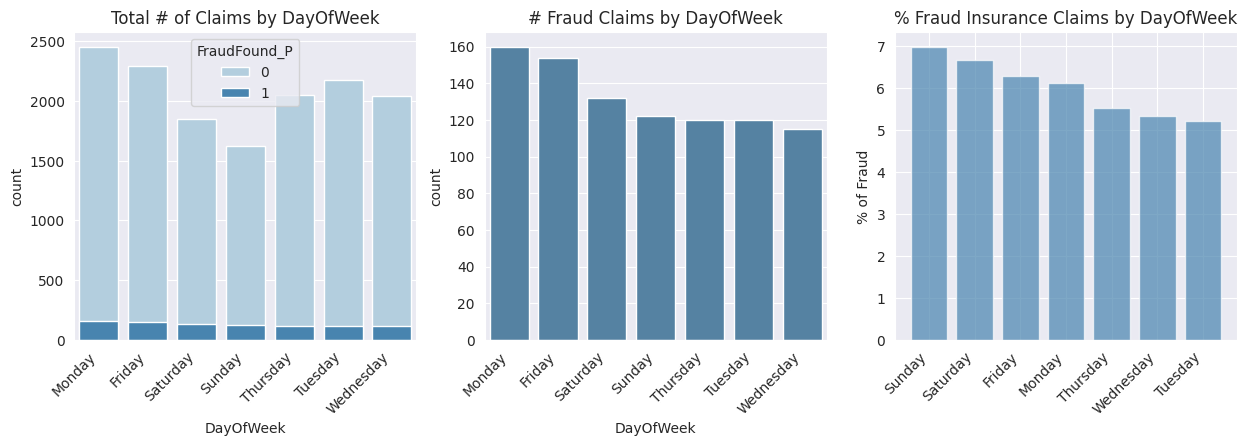

     Make  FraudFound_P  Count  Percentage of Fraud  Percentage of Total Fraud Cases
  Mecedes             1      1                25.00                             0.11
   Accura             1     59                12.50                             6.39
   Saturn             1      6                10.34                             0.65
     Saab             1     11                10.19                             1.19
     Ford             1     33                 7.33                             3.58
  Mercury             1      6                 7.23                             0.65
      BMW             1      1                 6.67                             0.11
    Honda             1    179                 6.39                            19.39
   Toyota             1    186                 5.96                            20.15
Chevrolet             1     94                 5.59                            10.18
  Pontiac             1    213                 5.55              

<ipython-input-40-9852021f5454>:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-40-9852021f5454>:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


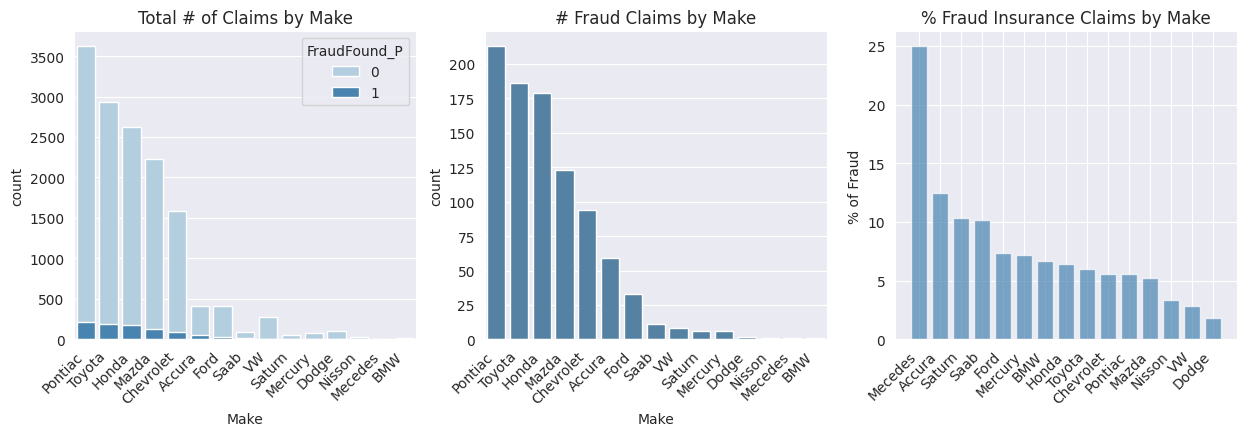

AccidentArea  FraudFound_P  Count  Percentage of Fraud  Percentage of Total Fraud Cases
       Rural             1    133                 8.32                            14.41
       Urban             1    790                 5.72                            85.59
       Urban             0  13032                94.28                              NaN
       Rural             0   1465                91.68                              NaN


<ipython-input-40-9852021f5454>:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-40-9852021f5454>:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


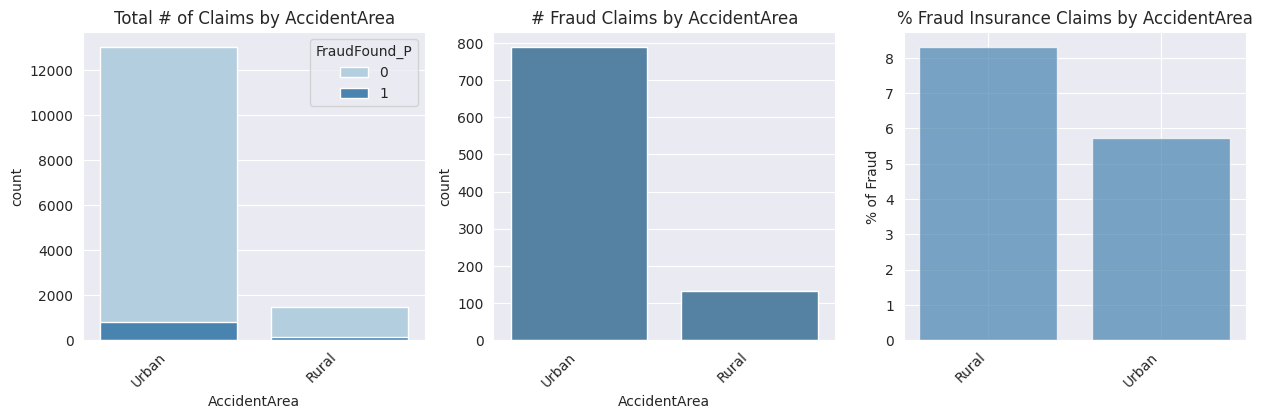

DayOfWeekClaimed  FraudFound_P  Count  Percentage of Fraud  Percentage of Total Fraud Cases
        Saturday             1     10                 7.87                             1.08
          Friday             1    164                 6.57                            17.77
       Wednesday             1    188                 6.37                            20.37
         Tuesday             1    198                 5.87                            21.45
          Sunday             1      3                 5.77                             0.33
          Monday             1    216                 5.75                            23.40
        Thursday             1    144                 5.41                            15.60
               0             0      1               100.00                              NaN
        Thursday             0   2516                94.59                              NaN
          Monday             0   3541                94.25                      

<ipython-input-40-9852021f5454>:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-40-9852021f5454>:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


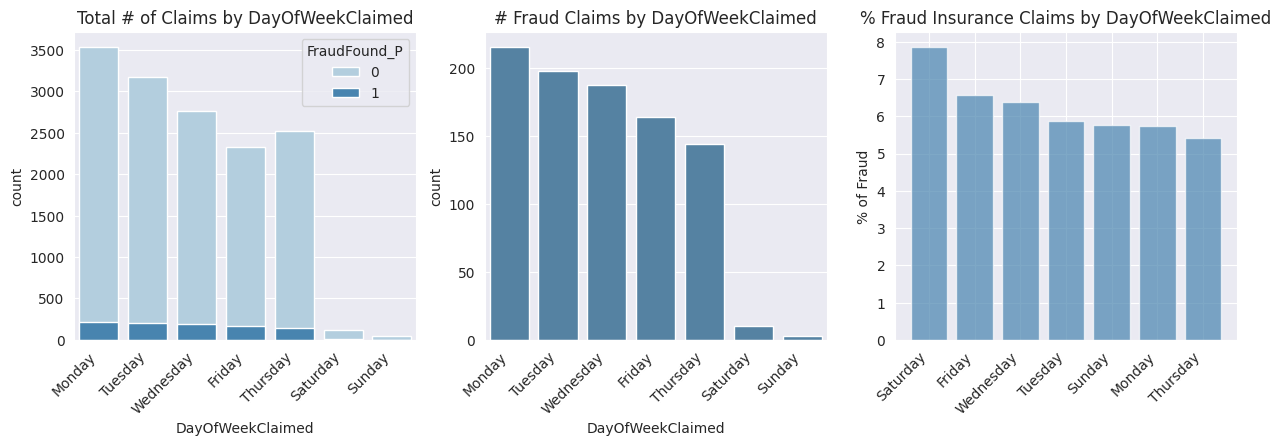

MonthClaimed  FraudFound_P  Count  Percentage of Fraud  Percentage of Total Fraud Cases
         Aug             1     92                 8.17                             9.97
         May             1    102                 7.23                            11.05
         Mar             1     97                 7.20                            10.51
         Apr             1     82                 6.45                             8.88
         Jan             1     92                 6.36                             9.97
         Sep             1     78                 6.28                             8.45
         Feb             1     78                 6.06                             8.45
         Jun             1     78                 6.03                             8.45
         Oct             1     73                 5.45                             7.91
         Jul             1     56                 4.57                             6.07
         Dec             1     4

<ipython-input-40-9852021f5454>:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-40-9852021f5454>:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


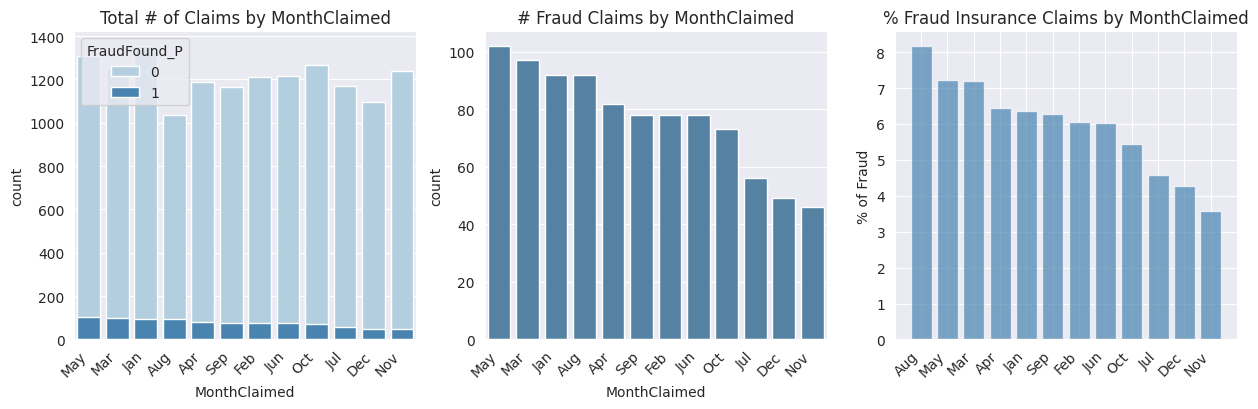

 WeekOfMonthClaimed  FraudFound_P  Count  Percentage of Fraud  Percentage of Total Fraud Cases
                  1             1    220                 6.38                            23.84
                  3             1    221                 6.17                            23.94
                  4             1    209                 6.09                            22.64
                  2             1    208                 5.59                            22.54
                  5             1     65                 5.27                             7.04
                  5             0   1169                94.73                              NaN
                  2             0   3512                94.41                              NaN
                  4             0   3224                93.91                              NaN
                  3             0   3362                93.83                              NaN
                  1             0   3230          

<ipython-input-40-9852021f5454>:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-40-9852021f5454>:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


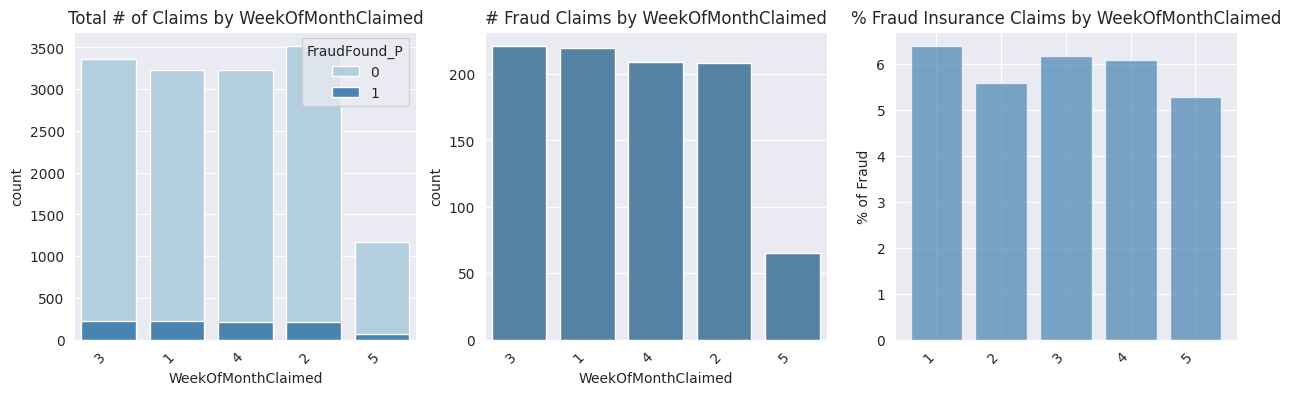

   Sex  FraudFound_P  Count  Percentage of Fraud  Percentage of Total Fraud Cases
  Male             1    818                 6.29                            88.62
Female             1    105                 4.34                            11.38
Female             0   2315                95.66                              NaN
  Male             0  12182                93.71                              NaN


<ipython-input-40-9852021f5454>:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-40-9852021f5454>:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


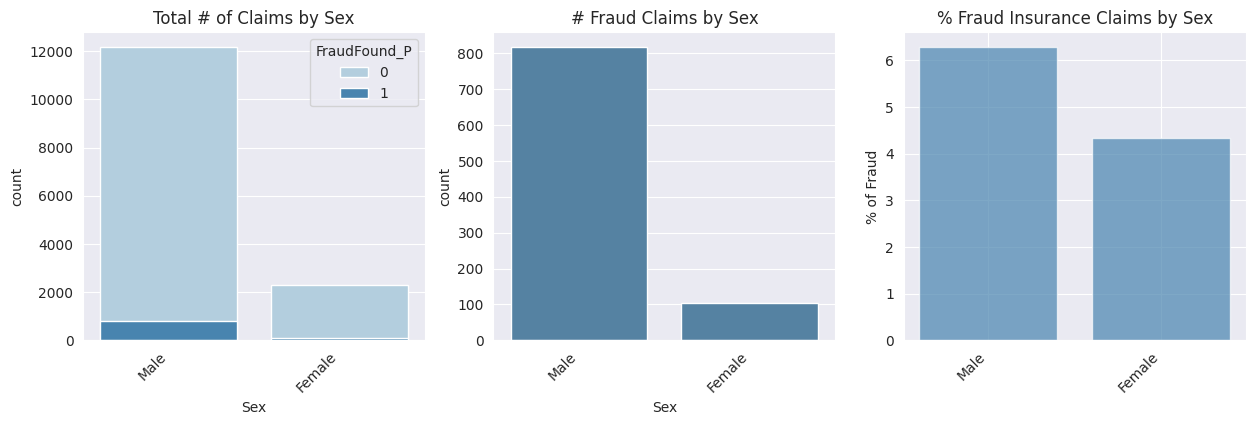

MaritalStatus  FraudFound_P  Count  Percentage of Fraud  Percentage of Total Fraud Cases
        Widow             1      3                 8.57                             0.33
      Married             1    639                 6.01                            69.23
       Single             1    278                 5.94                            30.12
     Divorced             1      3                 3.95                             0.33
     Divorced             0     73                96.05                              NaN
       Single             0   4406                94.06                              NaN
      Married             0   9986                93.99                              NaN
        Widow             0     32                91.43                              NaN


<ipython-input-40-9852021f5454>:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-40-9852021f5454>:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


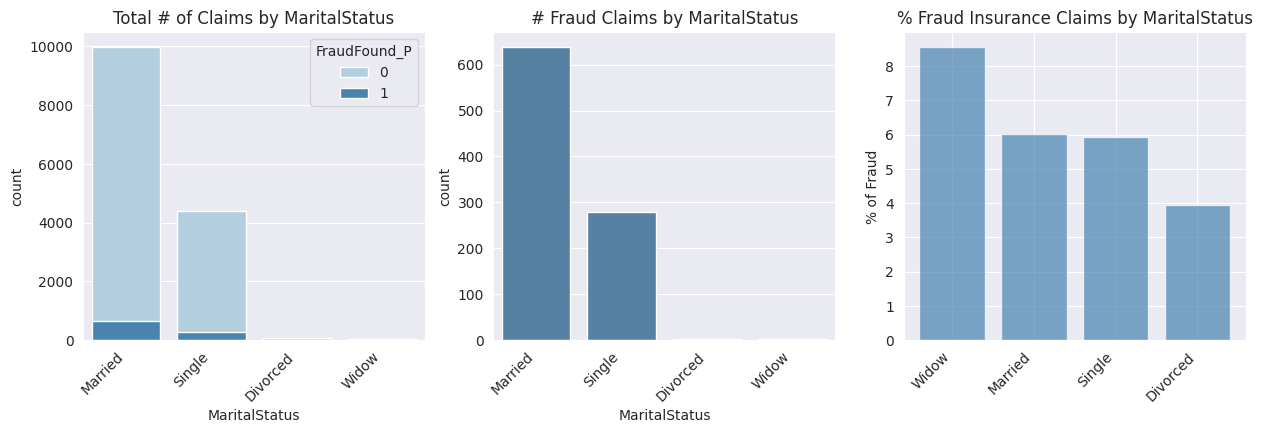

        Fault  FraudFound_P  Count  Percentage of Fraud  Percentage of Total Fraud Cases
Policy Holder             1    886                 7.89                            95.99
  Third Party             1     37                 0.88                             4.01
  Third Party             0   4153                99.12                              NaN
Policy Holder             0  10344                92.11                              NaN


<ipython-input-40-9852021f5454>:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-40-9852021f5454>:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


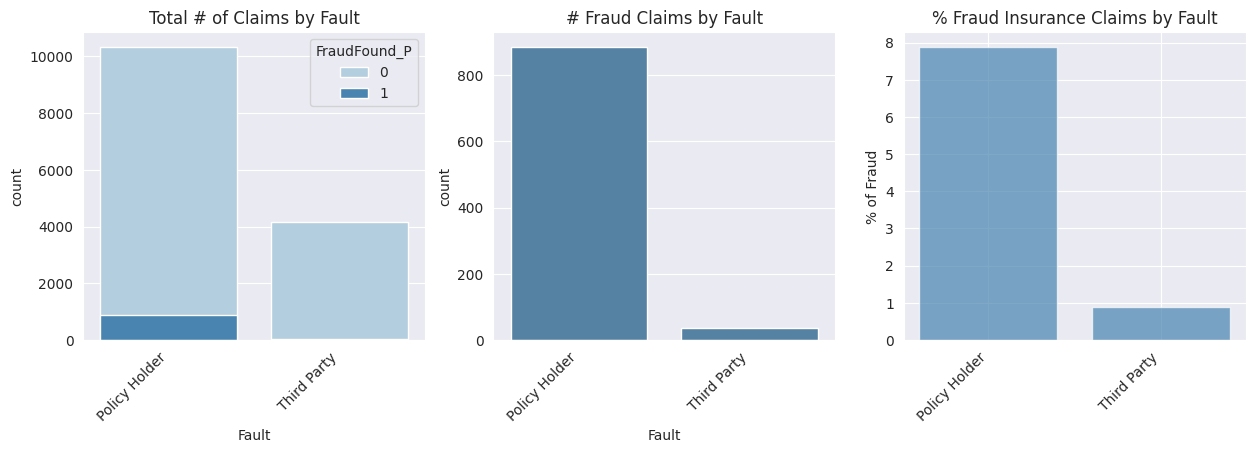

          PolicyType  FraudFound_P  Count  Percentage of Fraud  Percentage of Total Fraud Cases
   Sport - Collision             1     48                13.79                             5.20
Utility - All Perils             1     41                12.06                             4.44
  Sedan - All Perils             1    411                10.06                            44.53
 Utility - Collision             1      3                10.00                             0.33
   Sedan - Collision             1    384                 6.88                            41.60
   Sedan - Liability             1     36                 0.72                             3.90
  Sport - All Perils             0     22               100.00                              NaN
   Sport - Liability             0      1               100.00                              NaN
 Utility - Liability             0     21               100.00                              NaN
   Sedan - Liability             0   495

<ipython-input-40-9852021f5454>:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-40-9852021f5454>:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


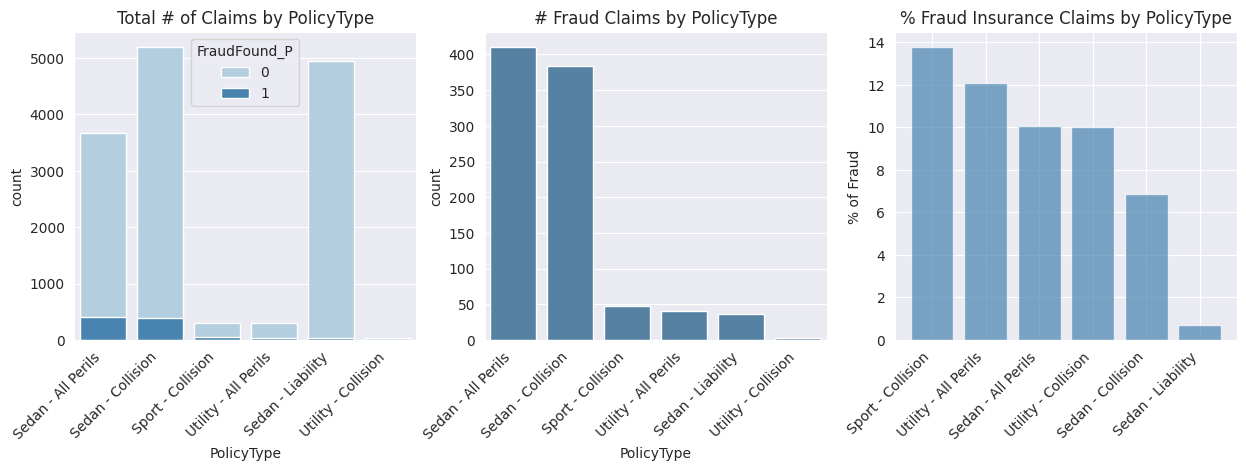

VehicleCategory  FraudFound_P  Count  Percentage of Fraud  Percentage of Total Fraud Cases
        Utility             1     44                11.25                             4.77
          Sedan             1    795                 8.22                            86.13
          Sport             1     84                 1.57                             9.10
          Sport             0   5274                98.43                              NaN
          Sedan             0   8876                91.78                              NaN
        Utility             0    347                88.75                              NaN


<ipython-input-40-9852021f5454>:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-40-9852021f5454>:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


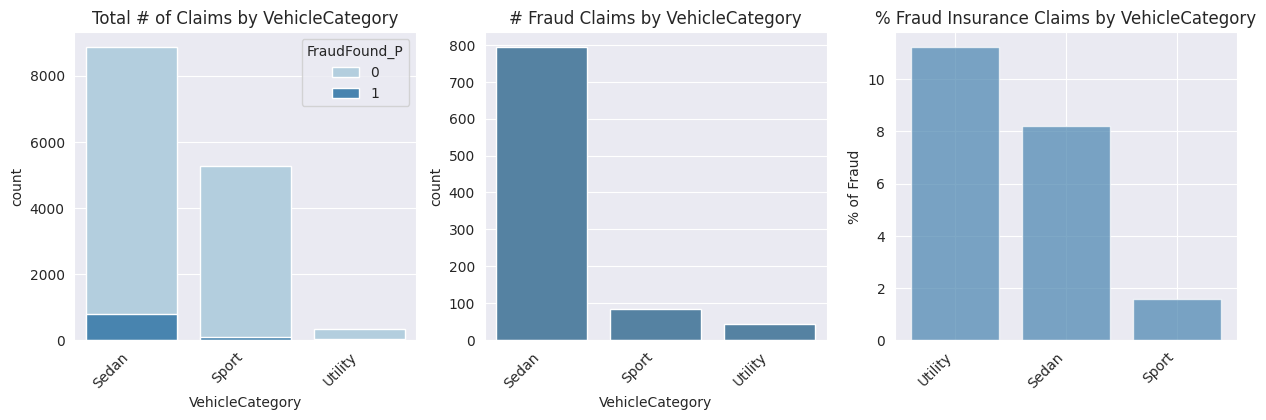

   VehiclePrice  FraudFound_P  Count  Percentage of Fraud  Percentage of Total Fraud Cases
less than 20000             1    103                 9.40                            11.16
more than 69000             1    189                 8.73                            20.48
 40000 to 59000             1     31                 6.72                             3.36
 20000 to 29000             1    421                 5.21                            45.61
 30000 to 39000             1    175                 4.95                            18.96
 60000 to 69000             1      4                 4.60                             0.43
 60000 to 69000             0     83                95.40                              NaN
 30000 to 39000             0   3358                95.05                              NaN
 20000 to 29000             0   7658                94.79                              NaN
 40000 to 59000             0    430                93.28                              NaN

<ipython-input-40-9852021f5454>:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-40-9852021f5454>:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


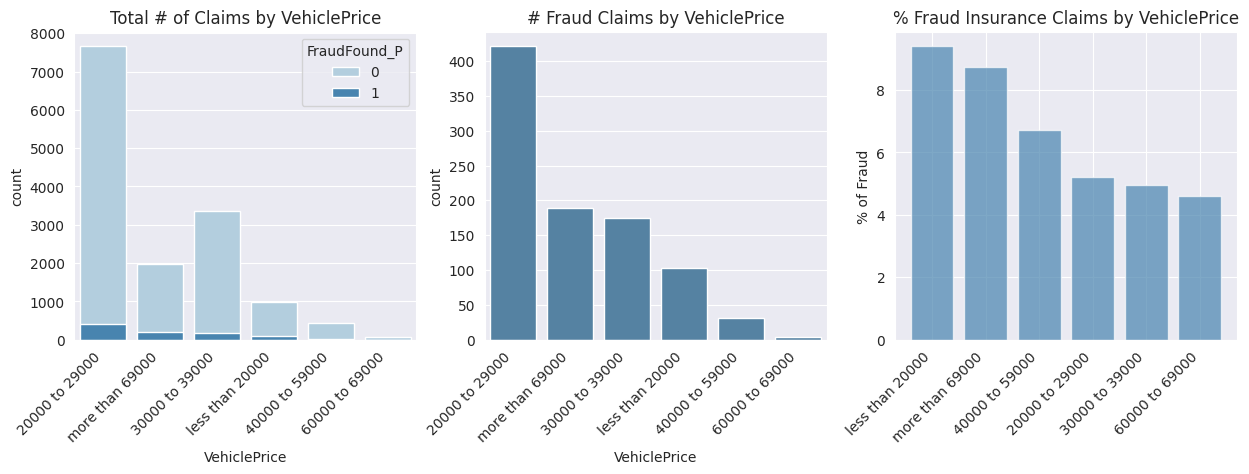

 PolicyNumber  FraudFound_P  Count  Percentage of Fraud  Percentage of Total Fraud Cases
           29             1      1                100.0                             0.11
           53             1      1                100.0                             0.11
           54             1      1                100.0                             0.11
           95             1      1                100.0                             0.11
           97             1      1                100.0                             0.11
          101             1      1                100.0                             0.11
          114             1      1                100.0                             0.11
          119             1      1                100.0                             0.11
          120             1      1                100.0                             0.11
          148             1      1                100.0                             0.11
          161        

<ipython-input-40-9852021f5454>:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-40-9852021f5454>:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


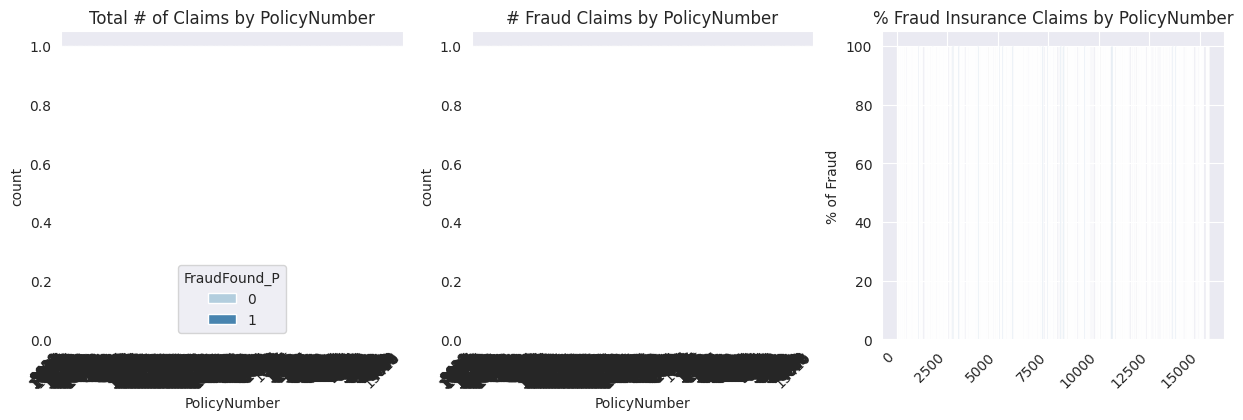

 RepNumber  FraudFound_P  Count  Percentage of Fraud  Percentage of Total Fraud Cases
         6             1     66                 7.01                             7.15
         7             1     74                 6.92                             8.02
        10             1     66                 6.69                             7.15
         9             1     65                 6.51                             7.04
        13             1     58                 6.50                             6.28
         1             1     63                 6.38                             6.83
         3             1     60                 6.32                             6.50
        14             1     57                 6.06                             6.18
        11             1     56                 5.91                             6.07
         2             1     55                 5.75                             5.96
         8             1     52                 5.59  

<ipython-input-40-9852021f5454>:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-40-9852021f5454>:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


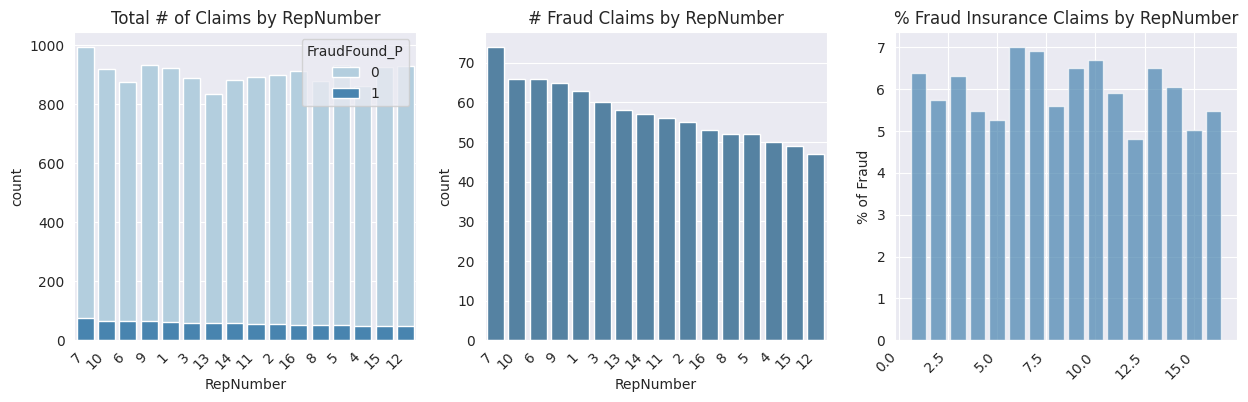

 Deductible  FraudFound_P  Count  Percentage of Fraud  Percentage of Total Fraud Cases
        300             1      2                25.00                             0.22
        500             1     47                17.87                             5.09
        700             1     18                 5.79                             1.95
        400             1    856                 5.77                            92.74
        400             0  13982                94.23                              NaN
        700             0    293                94.21                              NaN
        500             0    216                82.13                              NaN
        300             0      6                75.00                              NaN


<ipython-input-40-9852021f5454>:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-40-9852021f5454>:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


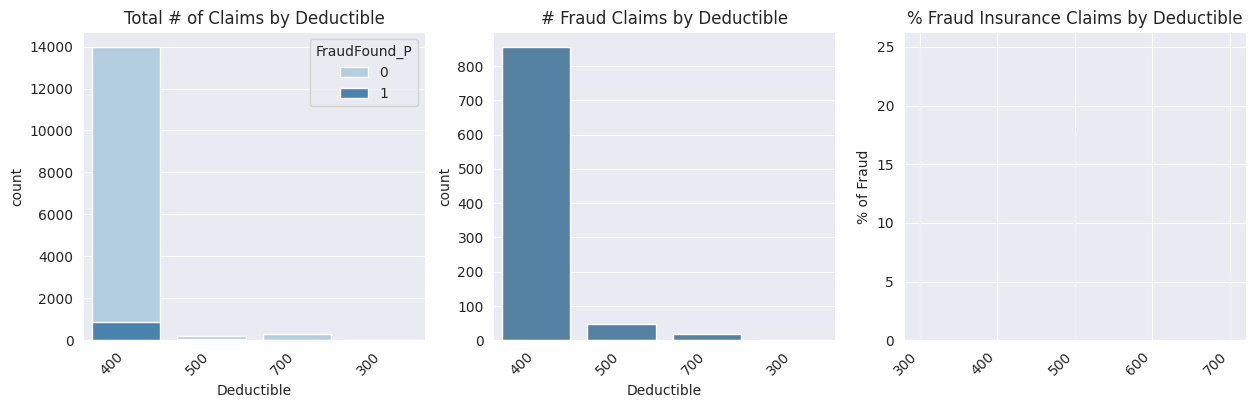

 DriverRating  FraudFound_P  Count  Percentage of Fraud  Percentage of Total Fraud Cases
            3             1    242                 6.23                            26.22
            4             1    235                 6.20                            25.46
            1             1    232                 5.88                            25.14
            2             1    214                 5.63                            23.19
            2             0   3587                94.37                              NaN
            1             0   3712                94.12                              NaN
            4             0   3556                93.80                              NaN
            3             0   3642                93.77                              NaN


<ipython-input-40-9852021f5454>:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-40-9852021f5454>:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


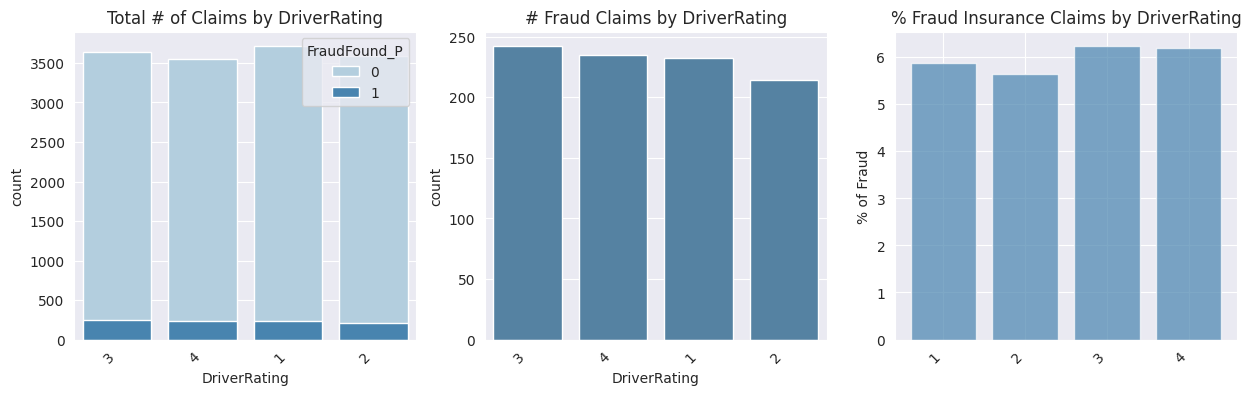

Days_Policy_Accident  FraudFound_P  Count  Percentage of Fraud  Percentage of Total Fraud Cases
                none             1      9                16.36                             0.98
             8 to 15             1      5                 9.09                             0.54
              1 to 7             1      1                 7.14                             0.11
            15 to 30             1      3                 6.12                             0.33
        more than 30             1    905                 5.94                            98.05
        more than 30             0  14342                94.06                              NaN
            15 to 30             0     46                93.88                              NaN
              1 to 7             0     13                92.86                              NaN
             8 to 15             0     50                90.91                              NaN
                none             0     4

<ipython-input-40-9852021f5454>:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-40-9852021f5454>:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


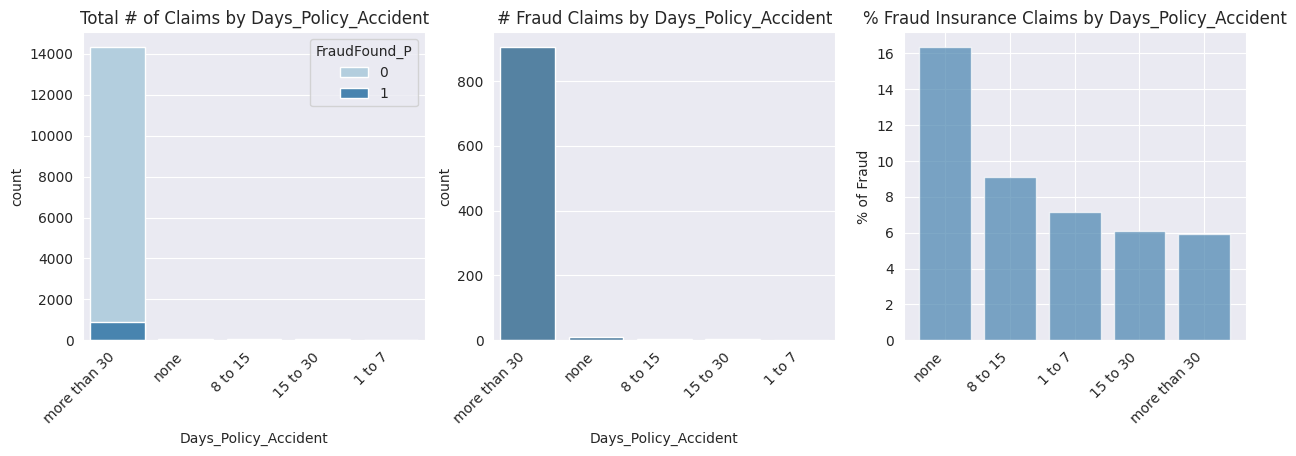

Days_Policy_Claim  FraudFound_P  Count  Percentage of Fraud  Percentage of Total Fraud Cases
          8 to 15             1      3                14.29                             0.33
         15 to 30             1      6                10.71                             0.65
     more than 30             1    914                 5.96                            99.02
             none             0      1               100.00                              NaN
     more than 30             0  14428                94.04                              NaN
         15 to 30             0     50                89.29                              NaN
          8 to 15             0     18                85.71                              NaN


<ipython-input-40-9852021f5454>:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-40-9852021f5454>:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


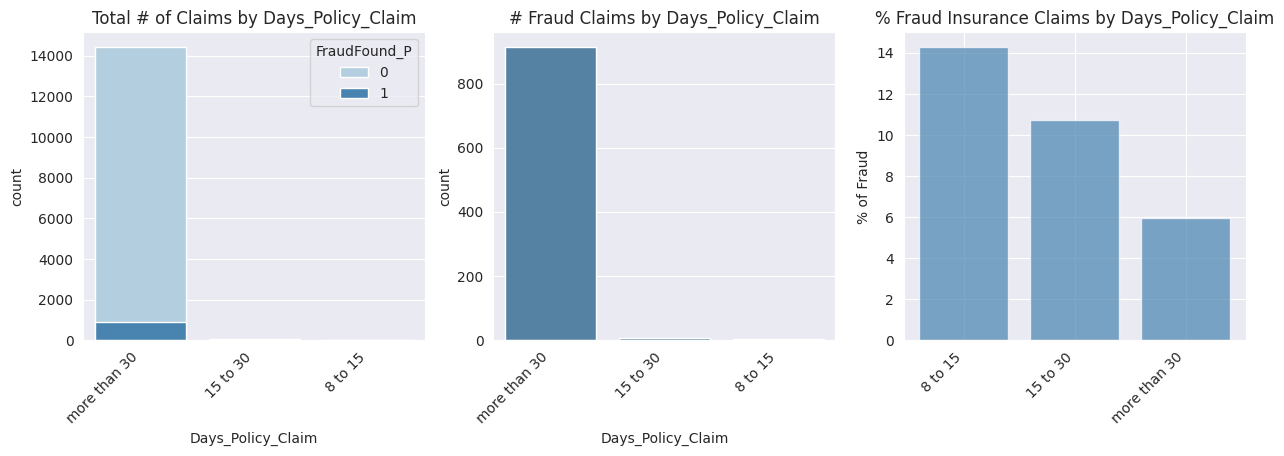

PastNumberOfClaims  FraudFound_P  Count  Percentage of Fraud  Percentage of Total Fraud Cases
              none             1    339                 7.79                            36.73
                 1             1    222                 6.21                            24.05
            2 to 4             1    294                 5.36                            31.85
       more than 4             1     68                 3.38                             7.37
       more than 4             0   1942                96.62                              NaN
            2 to 4             0   5191                94.64                              NaN
                 1             0   3351                93.79                              NaN
              none             0   4013                92.21                              NaN


<ipython-input-40-9852021f5454>:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-40-9852021f5454>:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


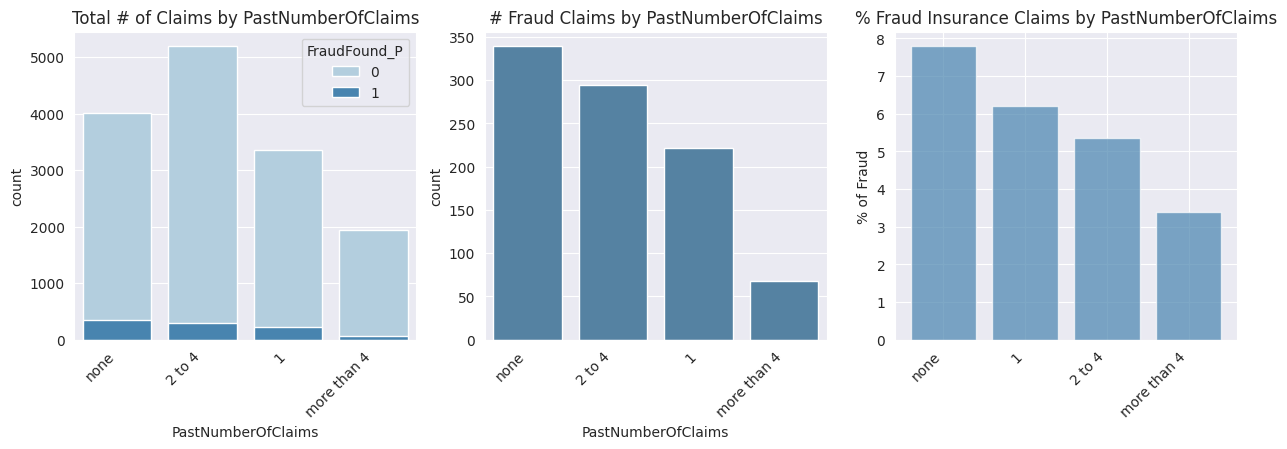

AgeOfVehicle  FraudFound_P  Count  Percentage of Fraud  Percentage of Total Fraud Cases
     4 years             1     21                 9.17                             2.28
         new             1     32                 8.58                             3.47
     3 years             1     13                 8.55                             1.41
     5 years             1     95                 7.00                            10.29
     6 years             1    228                 6.61                            24.70
     7 years             1    325                 5.60                            35.21
 more than 7             1    206                 5.17                            22.32
     2 years             1      3                 4.11                             0.33
     2 years             0     70                95.89                              NaN
 more than 7             0   3775                94.83                              NaN
     7 years             0   548

<ipython-input-40-9852021f5454>:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-40-9852021f5454>:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


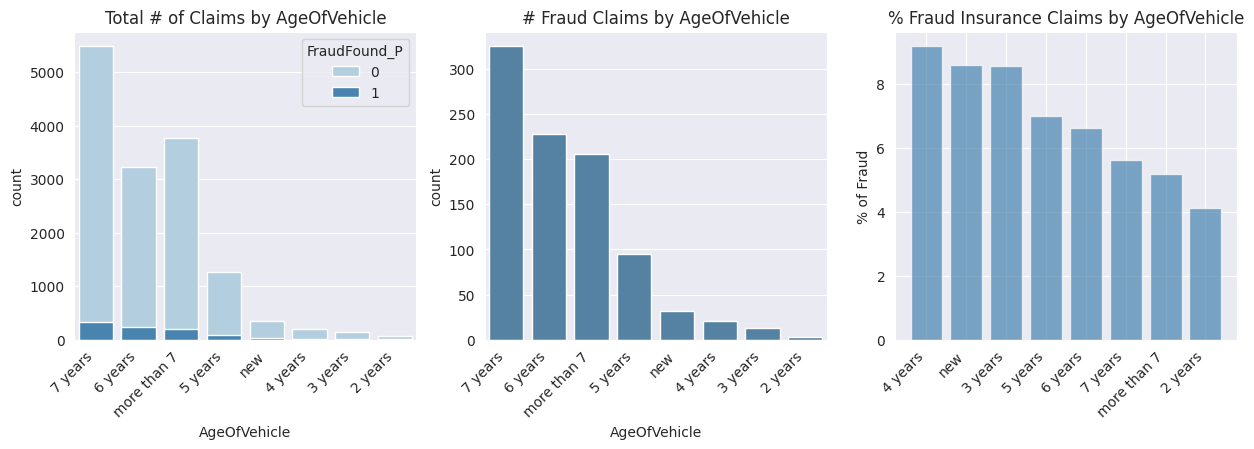

AgeOfPolicyHolder  FraudFound_P  Count  Percentage of Fraud  Percentage of Total Fraud Cases
         21 to 25             1     16                14.81                             1.73
         18 to 20             1      2                13.33                             0.22
         16 to 17             1     31                 9.69                             3.36
         31 to 35             1    360                 6.44                            39.00
          over 65             1     30                 5.91                             3.25
         36 to 40             1    237                 5.86                            25.68
         26 to 30             1     33                 5.38                             3.58
         41 to 50             1    144                 5.09                            15.60
         51 to 65             1     70                 5.03                             7.58
         51 to 65             0   1322                94.97           

<ipython-input-40-9852021f5454>:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-40-9852021f5454>:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


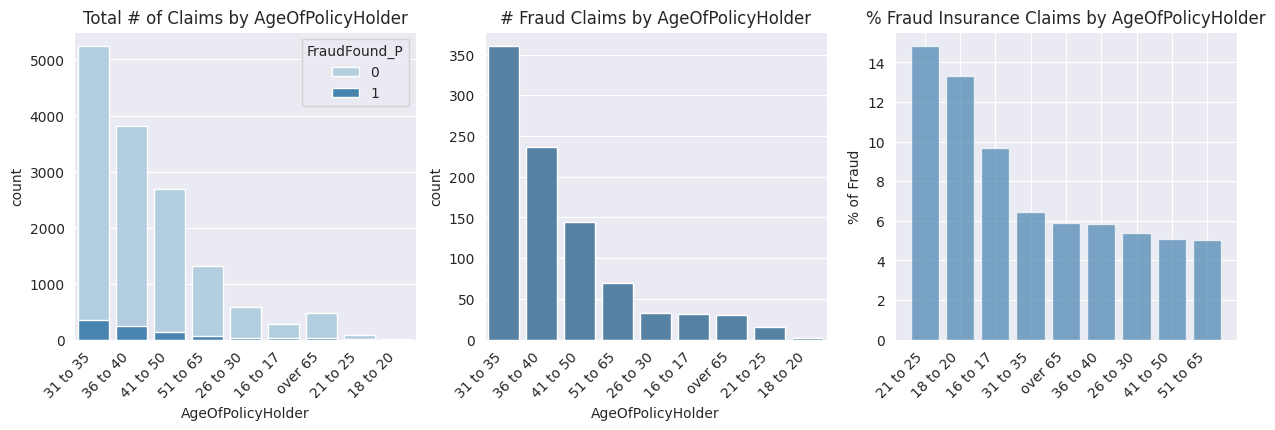

PoliceReportFiled  FraudFound_P  Count  Percentage of Fraud  Percentage of Total Fraud Cases
               No             1    907                 6.05                            98.27
              Yes             1     16                 3.74                             1.73
              Yes             0    412                96.26                              NaN
               No             0  14085                93.95                              NaN


<ipython-input-40-9852021f5454>:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-40-9852021f5454>:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


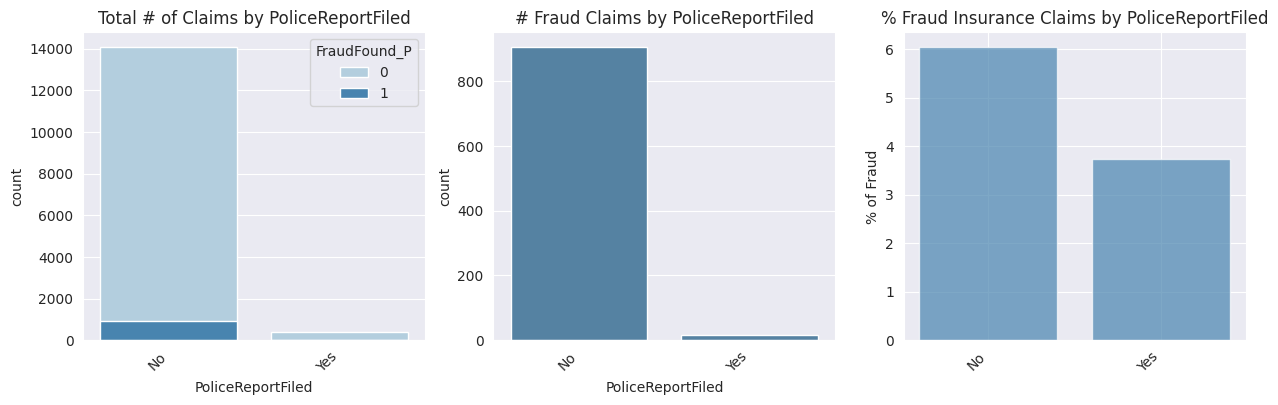

WitnessPresent  FraudFound_P  Count  Percentage of Fraud  Percentage of Total Fraud Cases
            No             1    920                 6.00                            99.67
           Yes             1      3                 3.45                             0.33
           Yes             0     84                96.55                              NaN
            No             0  14413                94.00                              NaN


<ipython-input-40-9852021f5454>:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-40-9852021f5454>:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


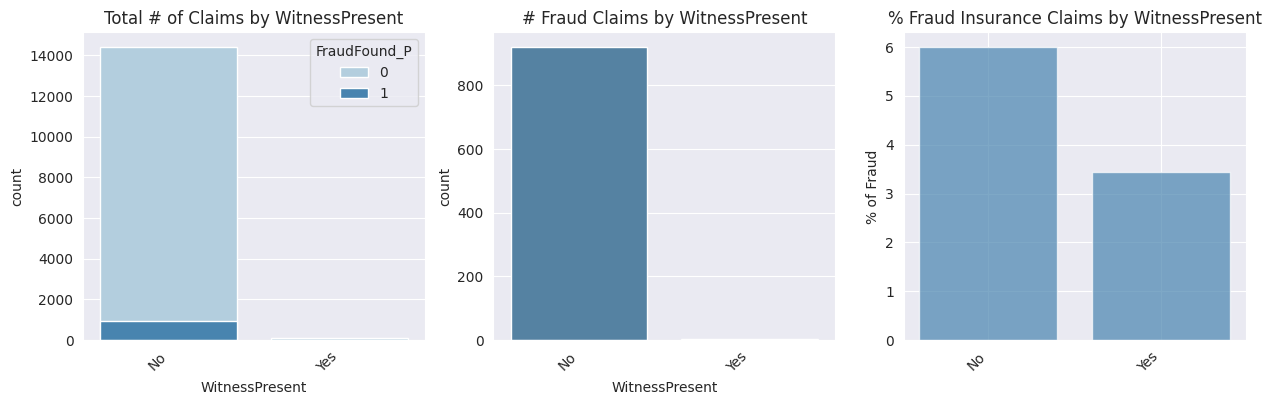

AgentType  FraudFound_P  Count  Percentage of Fraud  Percentage of Total Fraud Cases
 External             1    919                 6.05                            99.57
 Internal             1      4                 1.66                             0.43
 Internal             0    237                98.34                              NaN
 External             0  14260                93.95                              NaN


<ipython-input-40-9852021f5454>:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-40-9852021f5454>:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


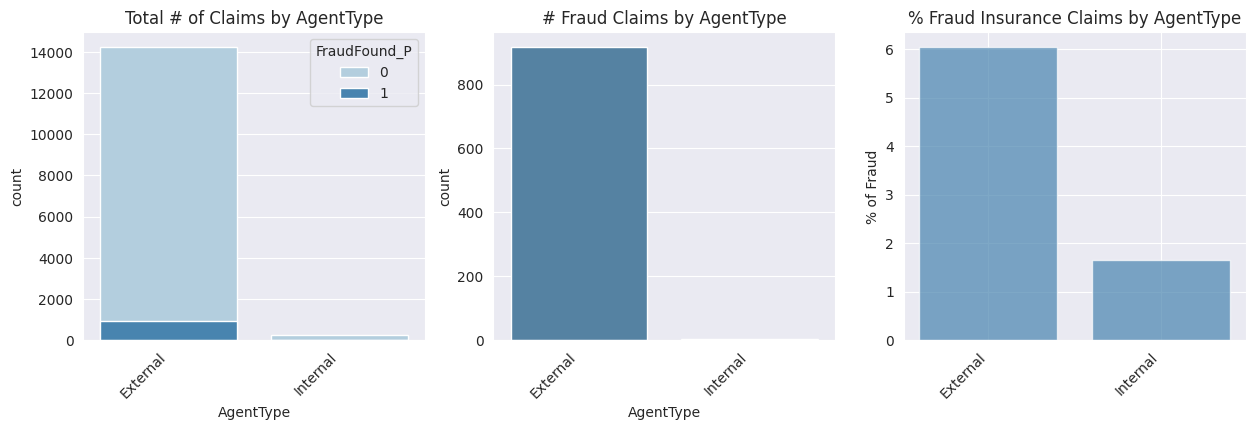

NumberOfSuppliments  FraudFound_P  Count  Percentage of Fraud  Percentage of Total Fraud Cases
               none             1    472                 6.70                            51.14
             1 to 2             1    159                 6.39                            17.23
        more than 5             1    195                 5.04                            21.13
             3 to 5             1     97                 4.81                            10.51
             3 to 5             0   1920                95.19                              NaN
        more than 5             0   3672                94.96                              NaN
             1 to 2             0   2330                93.61                              NaN
               none             0   6575                93.30                              NaN


<ipython-input-40-9852021f5454>:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-40-9852021f5454>:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


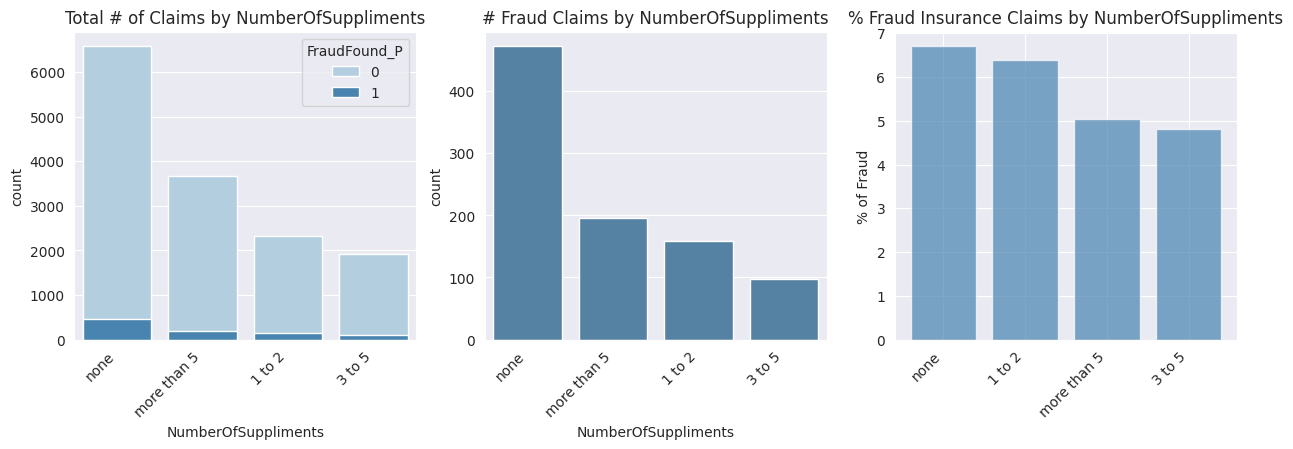

AddressChange_Claim  FraudFound_P  Count  Percentage of Fraud  Percentage of Total Fraud Cases
     under 6 months             1      3                75.00                             0.33
       2 to 3 years             1     51                17.53                             5.53
             1 year             1     11                 6.47                             1.19
          no change             1    825                 5.76                            89.38
       4 to 8 years             1     33                 5.23                             3.58
       4 to 8 years             0    598                94.77                              NaN
          no change             0  13499                94.24                              NaN
             1 year             0    159                93.53                              NaN
       2 to 3 years             0    240                82.47                              NaN
     under 6 months             0      1          

<ipython-input-40-9852021f5454>:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-40-9852021f5454>:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


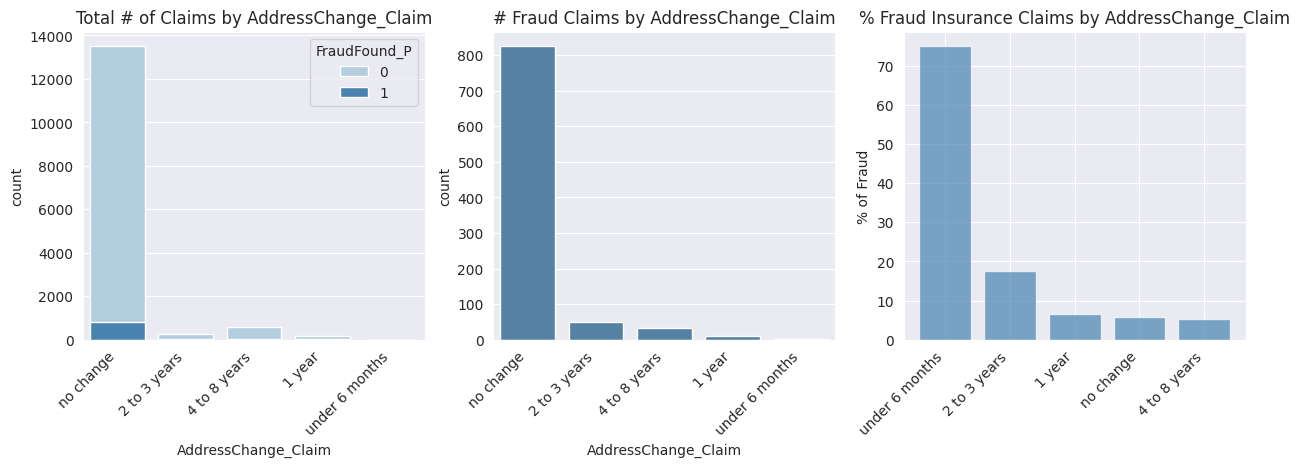

NumberOfCars  FraudFound_P  Count  Percentage of Fraud  Percentage of Total Fraud Cases
      3 to 4             1     29                 7.80                             3.14
  2 vehicles             1     43                 6.06                             4.66
   1 vehicle             1    850                 5.94                            92.09
      5 to 8             1      1                 4.76                             0.11
 more than 8             0      2               100.00                              NaN
      5 to 8             0     20                95.24                              NaN
   1 vehicle             0  13466                94.06                              NaN
  2 vehicles             0    666                93.94                              NaN
      3 to 4             0    343                92.20                              NaN


<ipython-input-40-9852021f5454>:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-40-9852021f5454>:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


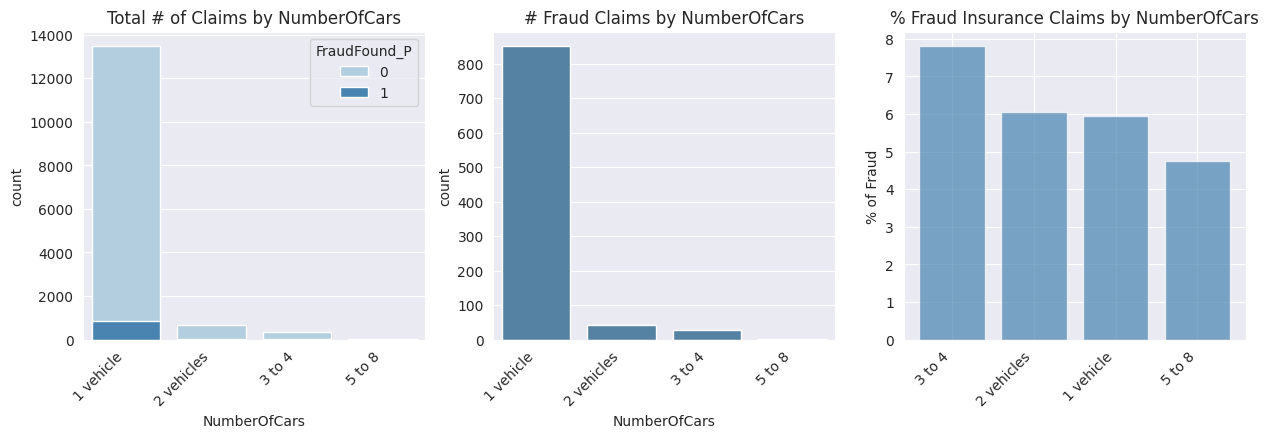

 Year  FraudFound_P  Count  Percentage of Fraud  Percentage of Total Fraud Cases
 1994             1    409                 6.66                            44.31
 1995             1    301                 5.79                            32.61
 1996             1    213                 5.22                            23.08
 1996             0   3870                94.78                              NaN
 1995             0   4894                94.21                              NaN
 1994             0   5733                93.34                              NaN


<ipython-input-40-9852021f5454>:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-40-9852021f5454>:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


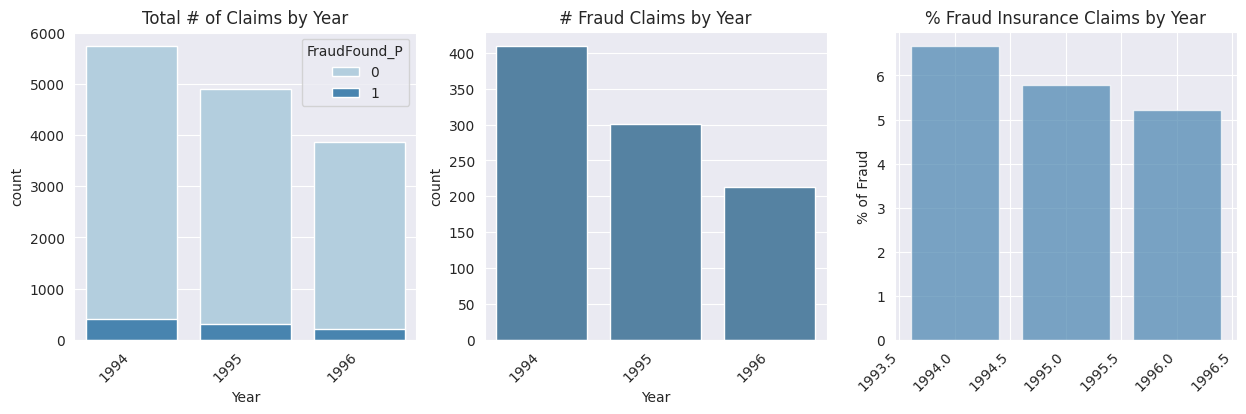

BasePolicy  FraudFound_P  Count  Percentage of Fraud  Percentage of Total Fraud Cases
All Perils             1    452                10.16                            48.97
 Collision             1    435                 7.30                            47.13
 Liability             1     36                 0.72                             3.90
 Liability             0   4973                99.28                              NaN
 Collision             0   5527                92.70                              NaN
All Perils             0   3997                89.84                              NaN


<ipython-input-40-9852021f5454>:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-40-9852021f5454>:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


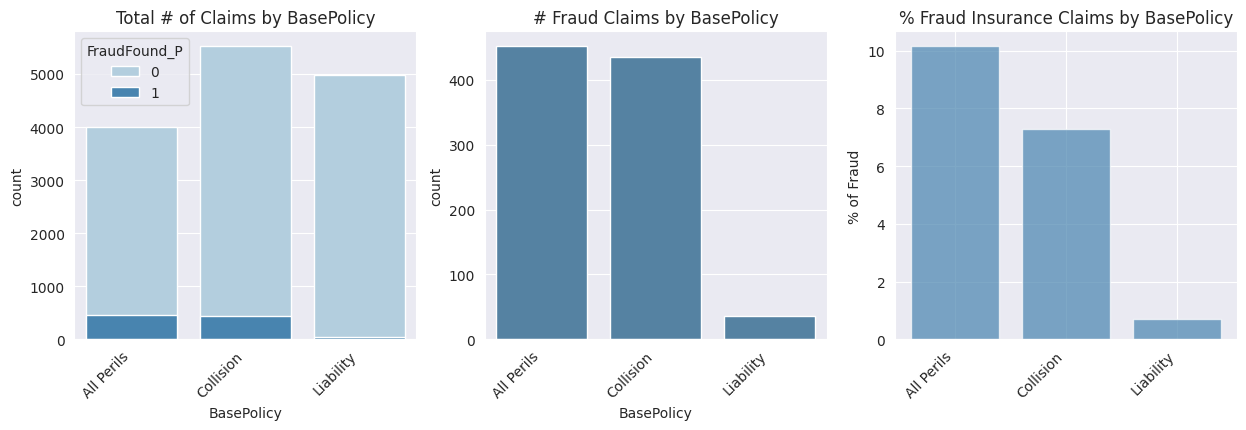

In [ ]:
for col in fraud.columns:
    if (col != 'FraudFound_P' and col !='Age'):
        sns.set_style('darkgrid')

        # Create a DataFrame for count and percentage of fraud cases
        fraud_cases = pd.DataFrame(fraud.groupby([col, 'FraudFound_P']).size(), columns=['Count']).reset_index()
        total_counts = fraud_cases.groupby(col)['Count'].transform('sum')
        fraud_cases['Percentage of Fraud'] = round(fraud_cases['Count'] / total_counts * 100, 2)


        if (fraud_cases['FraudFound_P'] == 1).any():
            total_fraud_cases = fraud_cases[fraud_cases['FraudFound_P'] == 1]['Count'].sum()
            fraud_cases.loc[fraud_cases['FraudFound_P'] == 1, 'Percentage of Total Fraud Cases'] = round(fraud_cases['Count'] / total_fraud_cases * 100, 2)

        fraud_cases = fraud_cases.sort_values(by=['FraudFound_P', 'Percentage of Fraud', col], ascending=[False, False, True])

        # Print the fraud_cases DataFrame
        print(fraud_cases.to_string(index=False))

        # Plot three graphs:
        fig, axes = plt.subplots(1, 3, figsize=(15, 4))

        # Plot 1: the count of FraudFound_P (both 0 and 1) for each category of a given variable
        plt.subplot(1, 3, 1)
        order = fraud[fraud['FraudFound_P'] == 1][col].value_counts().index
        ax = sns.countplot(data=fraud, x=col, hue='FraudFound_P', palette='Blues', dodge=False, order=order)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
        plt.title(f'Total # of Claims by {col}')

        # Plot 2: the count of FraudFound_P == 1 for each category of a given variable
        plt.subplot(1, 3, 2)
        ax = sns.countplot(data=fraud[fraud['FraudFound_P'] == 1], x=col, color='#4884af', dodge=False, order=order)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
        plt.title(f'# Fraud Claims by {col}')

        # Plot 3: the  % of FraudFound_P == 1 for each category of a given variable
        plt.subplot(1, 3, 3)
        fraud_cases_subset = fraud_cases[fraud_cases['FraudFound_P'] == 1]
        fraud_cases_subset = fraud_cases_subset.sort_values(by='Percentage of Fraud', ascending=False)  # Sort by Percentage of Fraud
        plt.bar(x=fraud_cases_subset[col], height=fraud_cases_subset['Percentage of Fraud'], color='#4884af', label='Percentage of Fraud', alpha=0.7)
        plt.xticks(rotation=45, ha='right')
        plt.ylabel('% of Fraud')
        plt.title(f'% Fraud Insurance Claims by {col}')

        plt.show()


In [ ]:
# I observed that DaysOfWeekClaimed and MonthClaimed both included 0 values
fraud[(fraud['DayOfWeekClaimed'] == '0') | (fraud['MonthClaimed'] == '0')]['FraudFound_P']

fraud[fraud['DayOfWeekClaimed'] == '0']

# lets remove rows where  DayOfWeekClaimed or MonthClaimed is equal to 0 (and FraudFound_P == 0)
fraud = fraud[~((fraud['FraudFound_P'] == 0) & ((fraud['DayOfWeekClaimed'] == '0') | (fraud['MonthClaimed'] == '0')))]


In [ ]:
#Dropping unnecessary columns
unnecessary_columns = ['Month', 'WeekOfMonth', 'DayOfWeek', 'DayOfWeekClaimed', 'WeekOfMonthClaimed', 'PolicyNumber']
fraud = fraud.drop(columns=unnecessary_columns, axis=1)
fraud.shape

(15419, 27)

# ***Encoding Categorical Variables - Label Encoding***

For the following categories:
*   AccidentArea
*   Sex
*   Fault
*   PoliceReportFiled
*   WitnessPresent
*   AgentType





In [ ]:
#Encoding
from sklearn.preprocessing import LabelEncoder

#Label Encoding Binary Categorical Variables
binary_columns = [col for col in fraud.columns if fraud[col].nunique() == 2 and col != 'FraudFound_P']
print('The number of Binary Columns: ', len(binary_columns))
print('Binary Columns: ', binary_columns)

le = LabelEncoder()
for col  in binary_columns:
    fraud[col] = le.fit_transform(fraud[col])
    print('Label Mapping: ', dict(zip(le.classes_, le.transform(le.classes_))))

The number of Binary Columns:  6
Binary Columns:  ['AccidentArea', 'Sex', 'Fault', 'PoliceReportFiled', 'WitnessPresent', 'AgentType']
Label Mapping:  {'Rural': 0, 'Urban': 1}
Label Mapping:  {'Female': 0, 'Male': 1}
Label Mapping:  {'Policy Holder': 0, 'Third Party': 1}
Label Mapping:  {'No': 0, 'Yes': 1}
Label Mapping:  {'No': 0, 'Yes': 1}
Label Mapping:  {'External': 0, 'Internal': 1}


In [ ]:
#
for col in ['VehiclePrice', 'DriverRating', 'AgeOfVehicle', 'BasePolicy']:
    print(f"The unique values in {col}: {fraud[col].unique()}")

The unique values in VehiclePrice: ['more than 69000' '20000 to 29000' '30000 to 39000' 'less than 20000'
 '40000 to 59000' '60000 to 69000']
The unique values in DriverRating: [1 4 3 2]
The unique values in AgeOfVehicle: ['3 years' '6 years' '7 years' 'more than 7' '5 years' 'new' '4 years'
 '2 years']
The unique values in BasePolicy: ['Liability' 'Collision' 'All Perils']


In [ ]:
#Label Encoding Categorical Variables (Ordinal Categorical Variables & Nominal Categorical Variables)
vehicleprice_label = {'more than 69000': 1, '20000 to 29000': 0,  '30000 to 39000': 0, 'less than 20000': 1, '40000 to 59000': 1, '60000 to 69000': 0}
ageofvehicle_label = {'new': 2, '2 years': 0, '3 years': 2, '4 years': 2, '5 years': 1, '6 years': 1, '7 years': 0, 'more than 7': 0}
basepolicy_label = {'Liability': 0, 'Collision': 1, 'All Perils': 2}

fraud['VehiclePrice'] = fraud['VehiclePrice'].map(vehicleprice_label)
fraud['AgeOfVehicle'] = fraud['AgeOfVehicle'].map(ageofvehicle_label)
fraud['BasePolicy'] = fraud['BasePolicy'].map(basepolicy_label)

# ***Encoding Categorical Variables - One-Hot Encoding***

In [ ]:
#I changed datatypes of some features into string before performing One-hot Encoding to correct identification of categories.
dtype_change_string = ['RepNumber', 'Deductible', 'Year']

for col in dtype_change_string:
    fraud[col] = fraud[col].astype(str)

In [ ]:
#One-Hot Encoding
onehot_columns = ['Make', 'MonthClaimed', 'MaritalStatus', 'PolicyType', 'VehicleCategory', 'RepNumber', 'Deductible', 'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfPolicyHolder', 'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year']

fraud = pd.get_dummies(fraud, columns=onehot_columns)
fraud.shape

onehot_columns = [col for col in fraud.columns if '_' in col]
onehot_columns.remove("FraudFound_P")
print("The Number of One-hot Encoded Columns: ", len(onehot_columns))

The Number of One-hot Encoded Columns:  105


# **Distribution of Age Variable**
Since the minimmum Age was 0, a closer look was needed.

In [ ]:
# Checking for the exact count of 0 Ages
fraud[fraud['Age'] == 0][['Age', 'FraudFound_P']].value_counts()


Age  FraudFound_P
0    0               288
     1                31
Name: count, dtype: int64

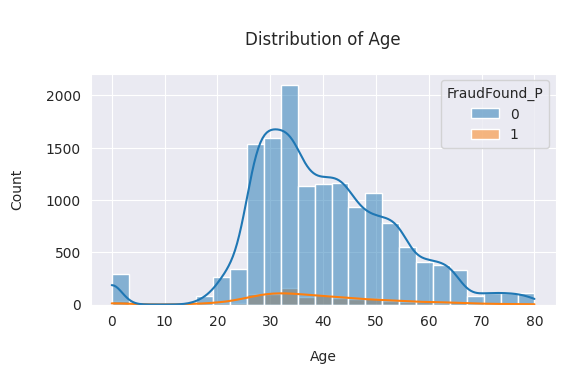

In [ ]:
# Taking a closer look on a distribution because the minimum value of Age is 0 which does not make sense
plt.figure(figsize=(6, 3))
sns.set_style('darkgrid')
sns.histplot(data=fraud, x='Age', kde=True, bins=25, hue='FraudFound_P')
plt.title('\nDistribution of Age\n')
plt.xlabel('\nAge')
plt.ylabel('Count\n')
plt.show()

In [ ]:
#Outlier Replacement using LightGBM
import lightgbm as lgb

def lightgbm_imputation(dataframe, feature):
    fraud = dataframe.copy()
    train_data = fraud[fraud[feature].notnull()]
    test_data = fraud[fraud[feature].isnull()]

    X_train = train_data.drop(columns=[feature], axis=1)
    y_train = train_data[feature]
    X_test = test_data.drop(columns=[feature], axis=1)

    train_dataset = lgb.Dataset(X_train, label=y_train)

    params = {
        'objective': 'regression',
        'metric': 'rmse',
        'boosting_type': 'gbdt',
        'verbose': -1
    }

    model = lgb.train(params, train_dataset, num_boost_round=100)

    predictions = model.predict(X_test)

    fraud.loc[fraud[feature].isnull(), feature] = predictions

    return fraud
# Change 0s and outliers into NullValues
fraud['Age'] = fraud['Age'].apply(lambda x: np.nan if x == 0 or x > 74 else x)
# Apply LightGBM Imputation
fraud = lightgbm_imputation(fraud, 'Age')
fraud['Age'] = fraud["Age"].apply(lambda x: round(x))


# **Imbalance Visualisation**
The dataset is very imbalanced with 94.01% (14,497) of non-fraud csaes and 5.99% (923) fraud cases.

In [ ]:
#
fraud_counts = fraud['FraudFound_P'].value_counts().reset_index()
fraud_counts.columns = ['FraudFound_P', 'Count']
fraud_counts

,FraudFound_P,Count
0,0,14496
1,1,923


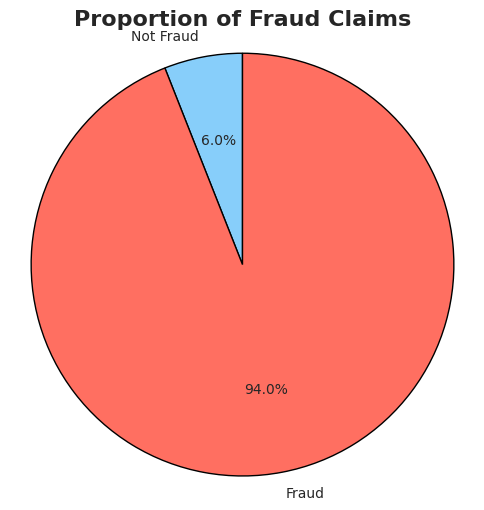

In [ ]:
# Proportion of Fraud Claims
fraud_counts = {'FraudFound_P': [0, 1], 'Count': [923, 14497]}
fraud_counts = pd.DataFrame(fraud_counts)
labels = ['Not Fraud', 'Fraud']
sizes = fraud_counts['Count']
colors = ['#87CEFA', '#FF6F61']

plt.figure(figsize=(6, 6))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1}
)

plt.title('Proportion of Fraud Claims', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.show()


Clearly from the above pie chart we can see that the data is imbalanced, the number of Fraud counts(Target Variable) is significantly less than the non-Fraud count and that will pose as an issue to our model performance.

# **Synthetic Minority Oversampling Technique (SMOTE) -Oversampling**

In [ ]:
# SMOTE Oversampling
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV

# Train - Test Split
X = fraud.drop(columns="FraudFound_P")
y = fraud["FraudFound_P"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#
smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

print("Before SMOTE: ", X_train.shape, y_train.shape)
print("After Smote: ", X_train_over.shape, y_train_over.shape)
print()
print("After SMOTE Label Distribution: ", pd.Series(y_train_over).value_counts())

fraud = pd.concat([X_train_over, y_train_over], axis=1)
fraud.shape

Before SMOTE:  (12335, 116) (12335,)
After Smote:  (23222, 116) (23222,)

After SMOTE Label Distribution:  FraudFound_P
1    11611
0    11611
Name: count, dtype: int64


(23222, 117)

# ***TRAINING THE MODELS***

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Separating features and target variable
X = fraud.drop('FraudFound_P', axis=1)
y = fraud['FraudFound_P']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


#***DECISION TREE***

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Create a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model on the SMOTE dataset
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the performance of the model
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
classification_rep_dt = classification_report(y_test, y_pred_dt)

# Print the results
print("\nDecision Tree Confusion Matrix:\n", conf_matrix_dt)
print("\nDecision Tree Classification Report:\n", classification_rep_dt)


Decision Tree Confusion Matrix:
 [[2148  175]
 [  91 2231]]

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94      2323
           1       0.93      0.96      0.94      2322

    accuracy                           0.94      4645
   macro avg       0.94      0.94      0.94      4645
weighted avg       0.94      0.94      0.94      4645



# ***LOGISTIC REGRESSION***

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model on the balanced dataset
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lg = logreg_model.predict(X_test)

# Evaluate the performance of the model
conf_matrix = confusion_matrix(y_test, y_pred_lg)
classification_rep = classification_report(y_test, y_pred_lg)

# Print the results
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)


Confusion Matrix:
 [[2320    3]
 [ 147 2175]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      2323
           1       1.00      0.94      0.97      2322

    accuracy                           0.97      4645
   macro avg       0.97      0.97      0.97      4645
weighted avg       0.97      0.97      0.97      4645



# ***RANDOM FOREST***

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
# Train the model on the balanced dataset
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the performance of the model
# accuracy_rf = accuracy_score(y_test_balanced, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

# Print the results
print("\nRandom Forest Confusion Matrix:\n", conf_matrix_rf)
print("\nRandom Forest Classification Report:\n", classification_rep_rf)
print(f'Size of the x-train, y-train, x-test, y-test: {len(X_train), len(y_train), len(X_test), len(y_test)}')


Random Forest Confusion Matrix:
 [[2310   13]
 [ 120 2202]]

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      2323
           1       0.99      0.95      0.97      2322

    accuracy                           0.97      4645
   macro avg       0.97      0.97      0.97      4645
weighted avg       0.97      0.97      0.97      4645

Size of the x-train, y-train, x-test, y-test: (18577, 18577, 4645, 4645)


# **VARIABLE DEFINITIONS**



*  Month: *The time frame for filing the insurance claim.*
*  week of the month: *The week of the month that the insurance claim was filed.*
*  DayOfWeek: *The day of the week that the person filed the insurance claim.*
*  Make: *The car's manufacturer that is the subject of the allegation.*
* AccidentArea: *The location of the accident (rural, urban, etc.).*
* DayOfWeekClaimed: *The insurance claim was processed on the day of the week that it was submitted.*
* MonthClaimed: *The time frame for processing the insurance claim.*
* WeekOfMonthClaimed: *The week associated with the processing of the insurance claim.*
* Sex: *The policyholder's gender.*
* Marital Status: *The policyholder's material status.*
* Age: *The policyholder's age.*
* Fault: *Indicates if the policyholder caused the accident or not.*
* PolicyType: *The kind of insurance policy, such as third-party or comprehensive.*
* VehicleCategory: *The vehicle's classification (e.g., SUV, sedan).*
* VehicleCost: *The cost of the car.*
* FraudFound_P: *Indicates if the insurance claim contained any evidence of fraud.*
* PolicyNumber: *The insurance policy's special identification number.*
* RepNumber: *The special number of the insurance agent who is in charge of the claim.*
* Deductible: *The sum that must be paid by the policyholder before the insurance provider covers the remaining expenses.*
* DriverRating: *The driver's rating, which is frequently determined by their driving record or other variables.*
* Days_Policy_Accident: *The period of time between the policy's issuance and the accident.*
* Days_Policy_Claim: *The period of time between the policy's issuance to the filing of the claim.*
* PastNumberOfClaims: *The policyholder's total number of prior claims.*
* AgeOfVehicle: *How old the car is that is being claimed.*
* AgeOfPolicyHolder: *The policyholder's age.*
* PoliceReportFiled: *Shows if a police report about the accident was submitted.*
* WitnessPresent: *Denotes if a witness was there when the accident occurred.*
* AgentType: *The kind of insurance agent (internal or external) that is handling the policy.*
* NumberOfSuppliments: *The total number of supplemental claims or documents, grouped into ranges, that are connected to the primary claim.*
* AddressChange_Claim: *Classified into ranges, this field indicates if the policyholder's address was altered at the time of the claim.*
* NumberOfCars: *The total number of vehicles covered by the insurance, broken down into ranges.*
* Year: *The year when the claim was submitted or handled.
BasePolicy: The type of base policy (e.g., All Perils, Liability, Collision).*




